# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [2]:
import pandas as pd
df_diabetes=pd.read_csv('/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_Supervised_MLProject/data/df_diabetes_mod.csv')

In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.0 KB


In [4]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


# Part II: Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Feature Engineering: define X and y, split data into trainning vs test
- Scaling and normalization
- Handling imbalanced data

In [8]:
X=df_diabetes.drop(columns='Outcome')
y=df_diabetes['Outcome']

In [90]:
predictor= X.columns
predictor

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.30, random_state = 50, stratify= df_diabetes['Outcome'])

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

### Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression

logit= LogisticRegression()

logit.fit(X_train, y_train)



LogisticRegression()

In [71]:
# Predict outcome from predictors from test data
logit_y_pred= clf.predict(X_test)

In [83]:
# Probablity of positive outcome
logit_test_prob = logit.predict_proba(X_test)[:, 1]

logit_confmat


/Users/tinapham/anaconda3/envs/LHL_Env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


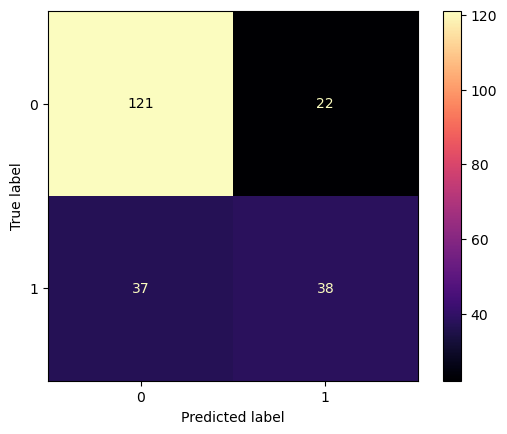

In [78]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
logit_confmat = confusion_matrix(logit_y_pred, y_test)
logit_confmat
print('logit_confmat')
plot_confusion_matrix(logit, X_test, y_test, cmap="magma")

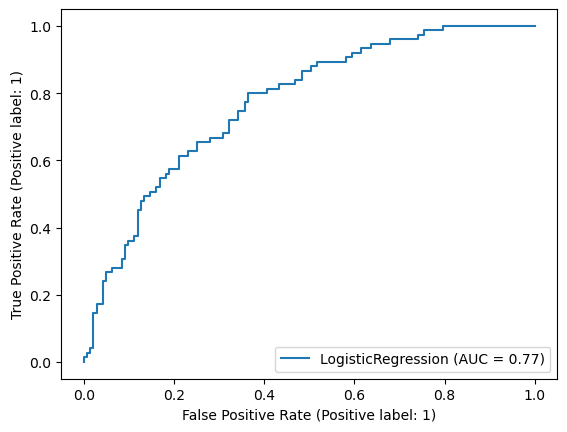

In [73]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(logit, X_test, y_test)
plt.show()

In [86]:
from sklearn.metrics import log_loss,roc_auc_score, accuracy_score,average_precision_score, precision_score, recall_score, f1_score
print('Log loss = {:.5f}'.format(log_loss(y_test, logit_test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, logit_test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, logit_test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, clf_y_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, clf_y_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, clf_y_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, clf_y_pred)))


Log loss = 0.58109
AUC = 0.77184
Average Precision = 0.60868

Using 0.5 as threshold:
Accuracy = 0.57339
Precision = 0.36765
Recall = 0.33333
F1 score = 0.34965


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       139
           1       0.72      0.62      0.67        79

    accuracy                           0.78       218
   macro avg       0.76      0.74      0.75       218
weighted avg       0.77      0.78      0.77       218



In [94]:
import numpy as np
pd.DataFrame(data={'predictors': predictor, 'coefficient': clf.coef_[0]})


,predictors,coefficient
0,Pregnancies,0.301360
1,Glucose,1.094660
2,BloodPressure,-0.204306
3,SkinThickness,0.020434
4,Insulin,-0.101923
5,BMI,0.673674
6,DiabetesPedigreeFunction,0.316859
7,Age,0.284725


### Random Forest Model

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)

rfc.fit(X_train, y_train)

print("model score: %.3f" % rfc.score(X_test, y_test))

model score: 0.725


In [66]:
rfc_y_pred= rfc.predict(X_test)

In [87]:
rfc_test_prob = rfc.predict_proba(X_test)[:, 1]

logit_confmat


/Users/tinapham/anaconda3/envs/LHL_Env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


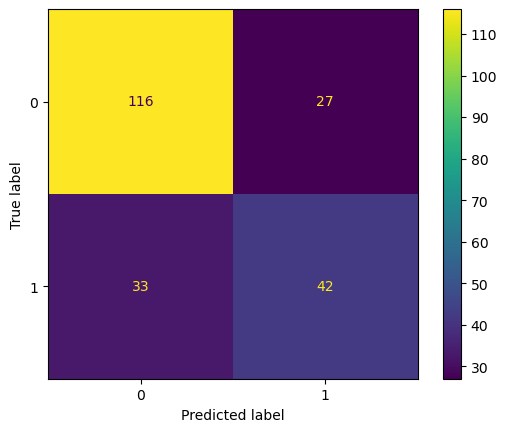

In [82]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
rfc_confmat = confusion_matrix(rfc_y_pred, y_test)
rfc_confmat
print('logit_confmat')
plot_confusion_matrix(rfc, X_test, y_test)

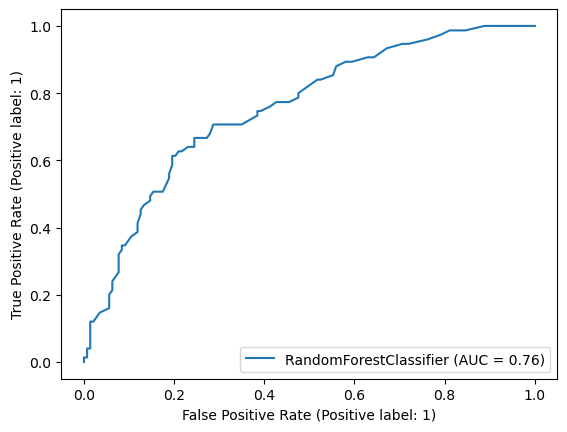

In [67]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(rfc, X_test, y_test)
plt.show()

In [88]:
from sklearn.metrics import log_loss,roc_auc_score, accuracy_score,average_precision_score, precision_score, recall_score, f1_score
print('Log loss = {:.5f}'.format(log_loss(y_test, rfc_test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, rfc_test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, rfc_test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, rfc_y_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, rfc_y_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, rfc_y_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, rfc_y_pred)))



Log loss = 0.55733
AUC = 0.75585
Average Precision = 0.59783

Using 0.5 as threshold:
Accuracy = 0.72477
Precision = 0.60870
Recall = 0.56000
F1 score = 0.58333


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       143
           1       0.61      0.56      0.58        75

    accuracy                           0.72       218
   macro avg       0.69      0.69      0.69       218
weighted avg       0.72      0.72      0.72       218



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.